In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
DATA_PATH = '../data/'

plt.style.use('ggplot')
sns.set_palette('colorblind')

train_log_df = pd.read_csv(os.path.join(DATA_PATH, 'train_log.csv'))
test_log_df = pd.read_csv(os.path.join(DATA_PATH, 'test_log.csv'))
print("Metadata loaded successfully")

Metadata loaded successfully


In [10]:
# Initial Exploration of training data
print("\n--- Training Data ---")
print("Shape of training data:", train_log_df.shape)
print("First 5 rows:")
print(train_log_df.head())
print("\nData types and missing values:")
train_log_df.info()


--- Training Data ---
Shape of training data: (3043, 8)
First 5 rows:
                  object_id       Z  Z_err    EBV SpecType  \
0  Dornhoth_fervain_onodrim  3.0490    NaN  0.110      AGN   
1       Dornhoth_galadh_ylf  0.4324    NaN  0.058    SN II   
2      Elrim_melethril_thul  0.4673    NaN  0.577      AGN   
3        Ithil_tobas_rodwen  0.6946    NaN  0.012      AGN   
4       Mirion_adar_Druadan  0.4161    NaN  0.058      AGN   

                               English Translation     split  target  
0  Trawn Folk (Dwarfs) + northern + Ents (people)   split_01       0  
1    Trawn Folk (Dwarfs) + tree + drinking vessel   split_01       0  
2                  Elves +  lover (fem.)  + breath  split_01       0  
3                    moon +  roof  +  noble maiden  split_01       0  
4            jewel, Silmaril  + father + Wild Man   split_01       0  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 8 co

In [12]:
# Target Variable Analysis
print("\n--- Target Variable Analysis ---")
target_counts = train_log_df['target'].value_counts()
target_percentage = train_log_df['target'].value_counts(normalize=True)*100

print("\nTarget Distribution")
print(target_counts)
print(f"\nPercentage of non-TDEs (0): {target_percentage[0]:.2f}%")
print(f"Percentage of TDEs (1): {target_percentage[1]:.2f}%")


--- Target Variable Analysis ---

Target Distribution
target
0    2895
1     148
Name: count, dtype: int64

Percentage of non-TDEs (0): 95.14%
Percentage of TDEs (1): 4.86%


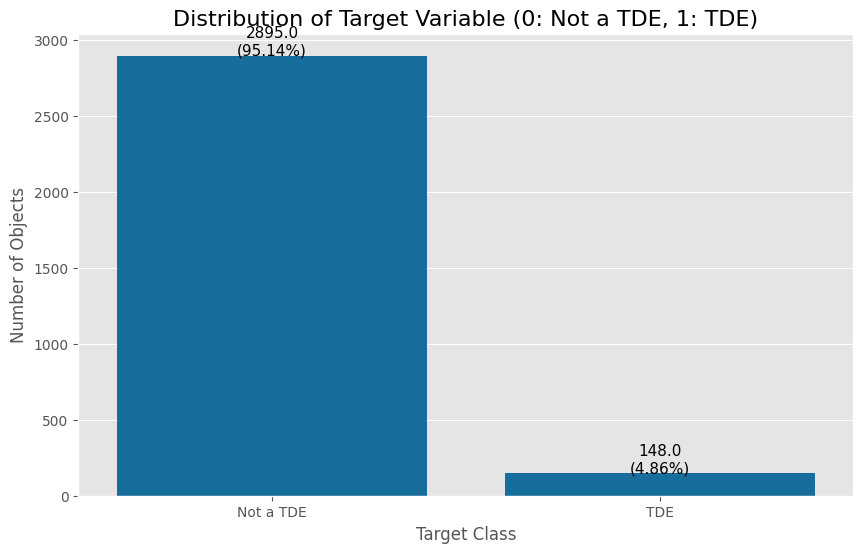

In [13]:
# Visualisation of targe distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='target', data=train_log_df)

plt.title('Distribution of Target Variable (0: Not a TDE, 1: TDE)', fontsize=16)
plt.xlabel('Target Class', fontsize=12)
plt.ylabel('Number of Objects', fontsize=12)
plt.xticks([0, 1], ['Not a TDE', 'TDE'])

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}\n({p.get_height() / len(train_log_df) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()

## Severe Class Imbalance  

The dataset is extremely imbalanced. 2,895 non TDEs and only 148 TDEs.